## 导入文件
- sheet_name=0（实际sheet1）

In [1]:
import pandas as pd

# 指定要读取的列
columns = ['Length/AA', 'AF-TM','1.0-0.9-TM','0.9-0.8-TM','0.8-0.7-TM','0.7-0.6-TM','0.6-0.5-TM','0.5-0.4-TM','0.4-0.3-TM','SPECIES']
# 读取.xlsx文件并只读取指定列的数据
df = pd.read_excel("H:\Graduation_project\DataBase\database.xlsx", usecols=columns,sheet_name=0)

print(df.head(5))
# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

   Length/AA    AF-TM  1.0-0.9-TM  0.9-0.8-TM  0.8-0.7-TM  0.7-0.6-TM  \
0        759  0.85580         NaN         NaN         NaN         NaN   
1        628  0.98741     0.97902         NaN     0.83727     0.84416   
2        124  0.93075     0.99898         NaN         NaN         NaN   
3        275  0.83440     0.97330         NaN         NaN         NaN   
4        145  0.84228         NaN     0.41233         NaN         NaN   

   0.6-0.5-TM  0.5-0.4-TM  0.4-0.3-TM     SPECIES  
0         NaN     0.63396     0.55569  Eukaryotic  
1         NaN         NaN         NaN  Eukaryotic  
2         NaN         NaN         NaN       Virus  
3         NaN         NaN         NaN       Virus  
4     0.71275         NaN     0.35696  Eukaryotic  
样本总量为:  168


样本总量为:  168


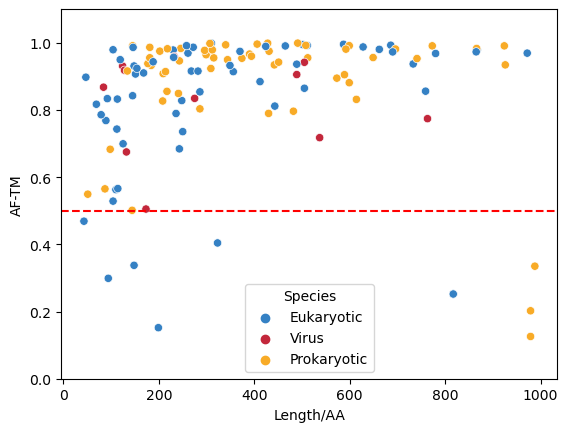

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Length/AA', y='AF-TM', hue='SPECIES', data=df, palette={'Eukaryotic': '#3581c4', 'Prokaryotic': '#f8ab27', 'Virus': '#c3273b'})
plt.ylim([0, 1.1])
plt.axhline(y=0.5, color='r', linestyle='--')

# 显示图例 
plt.legend(loc='best', title='Species')

# 计算'Length/AA'列的样本总量并输出结果
count = df['Length/AA'].count()
print("样本总量为: ", count)

plt.show()

88.70967741935483
94.91525423728814
100.0


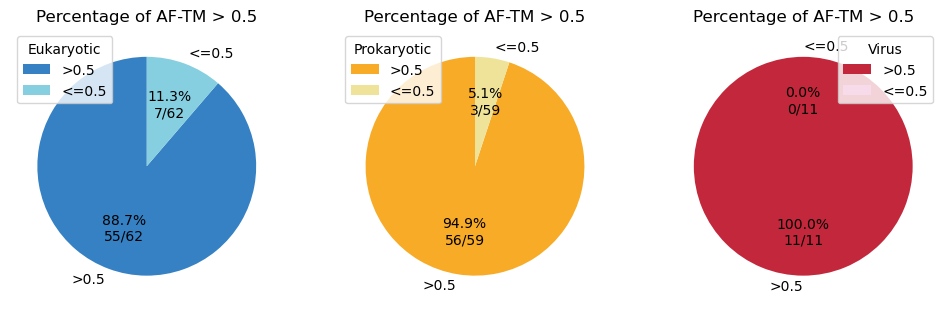

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择带有"Eukaryotic"标签的行
df_euka_rows = df[df['SPECIES'] == 'Eukaryotic']
# 计算每个数据集中大于0.5的tm数据个数和总tm数据个数的百分比
euka_total_tm = df_euka_rows['AF-TM'].count()
euka_below6_tm = (df_euka_rows['AF-TM'] > 0.5).sum()
euka_below6_percent = euka_below6_tm / euka_total_tm * 100
print(euka_below6_percent)

df_proka_rows = df[df['SPECIES'] == 'Prokaryotic']
proka_total_tm = df_proka_rows['AF-TM'].count()
proka_below6_tm = (df_proka_rows['AF-TM'] > 0.5).sum()
proka_below6_percent = proka_below6_tm / proka_total_tm * 100
print(proka_below6_percent)

df_viru_rows = df[df['SPECIES'] == 'Virus']
viru_total_tm = df_viru_rows['AF-TM'].count()
viru_below6_tm = (df_viru_rows['AF-TM'] > 0.5).sum()
viru_below6_percent = viru_below6_tm / viru_total_tm * 100
print(viru_below6_percent)

###############————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
# Format the label to include count and percentage
def label_format(pct, count):
    absolute = int(count * pct / 100.0 + 0.5)
    return "{:.1f}%\n{}/{:.0f}".format(pct, absolute, count)

# 创建饼图数据
data1 = [euka_below6_tm, euka_total_tm - euka_below6_tm]
data2 = [proka_below6_tm, proka_total_tm - proka_below6_tm]
data3 = [viru_below6_tm, viru_total_tm - viru_below6_tm]
labels = ['>0.5', '<=0.5']

colors1 = ['#3581c4', '#86cfe0']
colors2 = ['#f8ab27', '#eee398']
colors3 = ['#c3273b', '#f7dbeb']

# 创建包含 3 个子图的图形窗口
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

if euka_below6_percent >= 0:
    axs[0].pie(data1, labels=labels, colors=colors1, autopct=lambda pct: label_format(pct, euka_total_tm), startangle=90)
    axs[0].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[0].legend(labels, title='Eukaryotic', loc='best')
else: 
    axs[0].axis('off')

if proka_below6_percent >= 0:
    axs[1].pie(data2, labels=labels, colors=colors2, autopct=lambda pct: label_format(pct, proka_total_tm), startangle=90)
    axs[1].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[1].legend(labels, title='Prokaryotic', loc='best')
else: 
    axs[1].axis('off')

if viru_below6_percent >= 0:
    axs[2].pie(data3, labels=labels, colors=colors3, autopct=lambda pct: label_format(pct, viru_total_tm), startangle=90)
    axs[2].set_title('Percentage of AF-TM > 0.5', loc='center')
    axs[2].legend(labels, title='Virus', loc='best')
else: 
    axs[2].axis('off')



# 显示饼图
plt.show()


## 蜂窝图

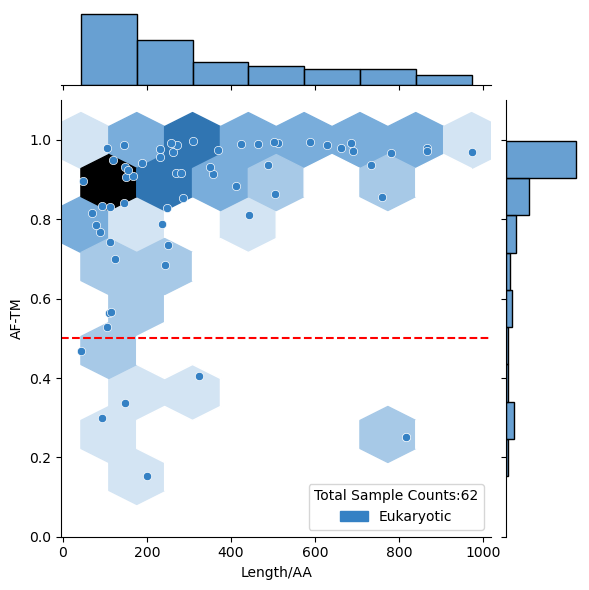

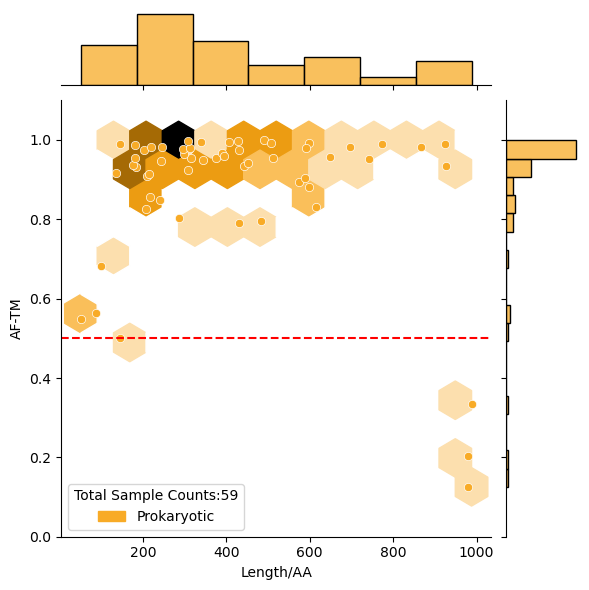

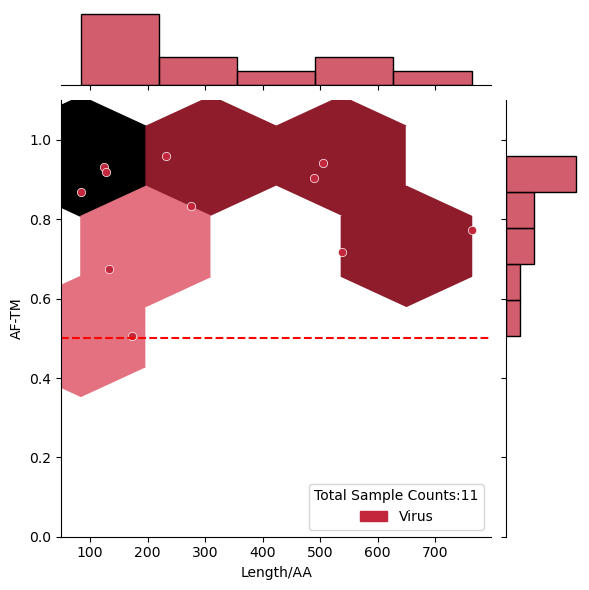

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择带有"Eukaryotic"标签的行
df_euka_rows = df[df['SPECIES'] == 'Eukaryotic']
df_proka_rows = df[df['SPECIES'] == 'Prokaryotic']
df_virus_rows = df[df['SPECIES'] == 'Virus']

# 绘制散点图附带直方图
sns.jointplot(x='Length/AA',y='AF-TM',data=df_euka_rows,kind="hex", label='Eukaryotic', color='#3581c4', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_euka_rows, color='#3581c4')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_euka_rows['AF-TM'].count()), loc='lower right')
# 更改图例方块的颜色
for handle in leg.legendHandles:
    handle.set_color('#3581c4')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_proka_rows,kind="hex", label='Prokaryotic', color='#f8ab27', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_proka_rows, color='#f8ab27')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_proka_rows['AF-TM'].count()), loc='lower left')
for handle in leg.legendHandles:
    handle.set_color('#f8ab27')

sns.jointplot(x='Length/AA',y='AF-TM',data=df_virus_rows,kind="hex", label='Virus', color='#c3273b', ylim=(0, 1.1))
sns.scatterplot(x='Length/AA', y='AF-TM', data=df_virus_rows, color='#c3273b')
plt.axhline(y=0.5, color='r', linestyle='--')
leg = plt.legend(title="Total Sample Counts:"+str(df_virus_rows['AF-TM'].count()), loc='lower right')
for handle in leg.legendHandles:
    handle.set_color('#c3273b')

plt.show()